## Task3 - Performing Business Analytics 

- **Performing Exploratory data analysis on 'SampleSuperStore' dataset**

### Author: SOUBHAGYA RANJAN BAL

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
store=pd.read_csv('SampleSuperstore.csv')
store.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
store.shape

(9994, 13)

In [4]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Data Cleaning

In [7]:
#Deleting Identicle rows to reduce noise from the data
store.drop_duplicates(keep= 'first',inplace=True)

In [8]:
store

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
store.shape

(9977, 13)

- 9994-9977=17 duplicate rows been deleted 

### Exploratory Data Analysis (EDA) and Visualization

In [10]:
s1=store.groupby('Category')['Sales'].sum().reset_index()

In [11]:
s2=store.groupby('Category')['Profit'].sum().reset_index()

In [12]:
s1['Profit']=s2['Profit']
s1

,Category,Sales,Profit
0,Furniture,741306.3133,18421.8137
1,Office Supplies,718735.2440,122364.6608
2,Technology,836154.0330,145454.9481


- **Which Product sub-category is giving more profit  ?**

In [13]:
store_sub=store.groupby('Sub-Category')['Profit'].sum().reset_index()
store_sub.sort_values(by=['Profit'],ascending=False)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,33944.2395
3,Binders,30228.0003
5,Chairs,26567.1278
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13052.7230
7,Envelopes,6964.1767


- **Copiers** are more profitable sub-category where as **Tables**  are least

- **Product Category and Sub-Category wise Sales and Profit**

In [14]:
store_cat_sub=store.groupby(['Category','Sub-Category'])['Sales','Profit'].sum().reset_index()
store_cat_sub.sort_values(by=['Sales'],ascending=False)

,Category,Sub-Category,Sales,Profit
16,Technology,Phones,330007.0540,44515.7306
1,Furniture,Chairs,327777.7610,26567.1278
11,Office Supplies,Storage,223843.6080,21278.8264
3,Furniture,Tables,206965.5320,-17725.4811
6,Office Supplies,Binders,203409.1690,30228.0003
15,Technology,Machines,189238.6310,3384.7569
13,Technology,Accessories,167380.3180,41936.6357
14,Technology,Copiers,149528.0300,55617.8249
0,Furniture,Bookcases,114879.9963,-3472.5560
4,Office Supplies,Appliances,107532.1610,18138.0054


- Furniture with subcategory of **Tables** is incurring more $loss$ where as Sales are $High$ .

### Top 10  states by Sales and Profit

In [15]:
Top_10_Sales = store.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = store.groupby("State").Profit.sum().nlargest(n =10)

In [16]:
Top_10_Sales.reset_index()

,State,Sales
0,California,457576.2715
1,New York,310827.1510
2,Texas,170124.5418
3,Washington,138560.8100
4,Pennsylvania,116496.3620
5,Florida,89473.7080
6,Illinois,80162.5370
7,Ohio,77976.7640
8,Michigan,75879.6440
9,Virginia,70636.7200


In [17]:
Top_10_Profits.reset_index()

,State,Profit
0,California,76330.7891
1,New York,74015.4622
2,Washington,33368.2375
3,Michigan,24428.0903
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


### Pair Plot

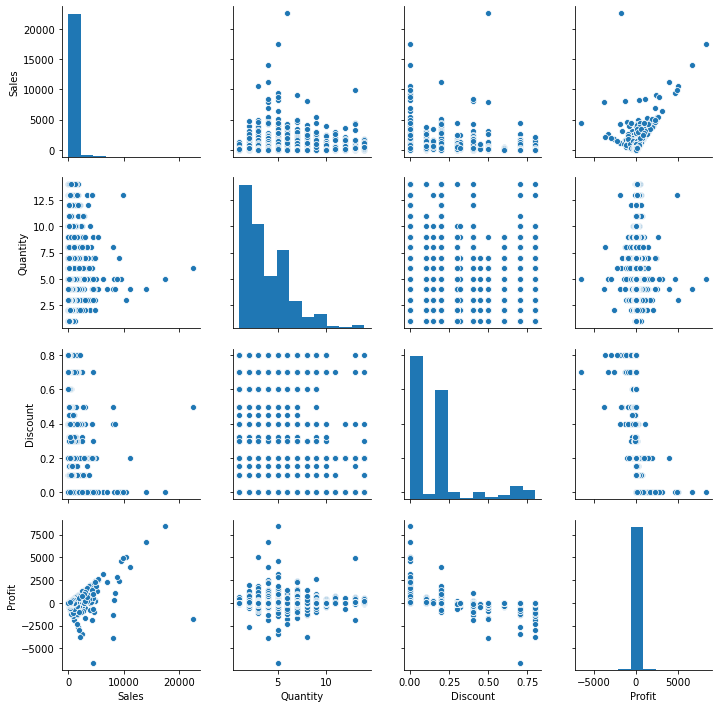

In [18]:
pp=store.loc[:,['Sales','Quantity','Discount','Profit']]
sb.pairplot(pp)

### Finding Correlation

<AxesSubplot:>

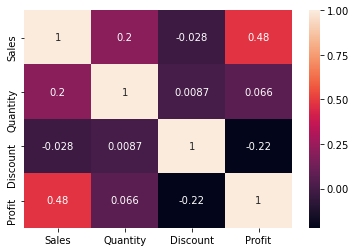

In [19]:
correlation=pp.corr()
sb.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

- From the above plot we infer that: 
- 1) Sales and Profits are positively correlated
- 2) Discount and Profits are Negatively correlated



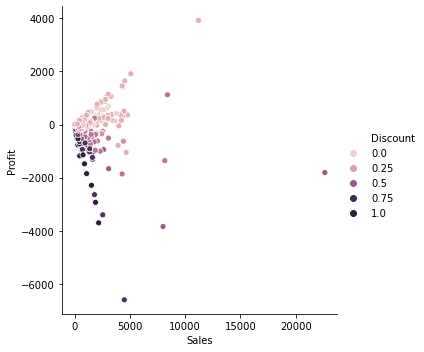

In [20]:
#When there is discount is given
store_discount=store[store['Discount']!=0]
sb.relplot(x='Sales',y='Profit',hue='Discount',data=store_discount)

- In above graph we see that as percentages of Discount increses the sales is also goes increses but profit goes decreases

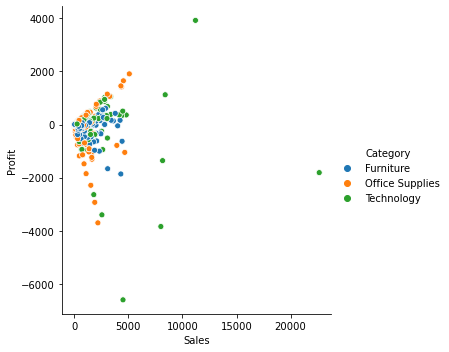

In [21]:
sb.relplot(x='Sales',y='Profit',hue='Category',data=store_discount)

### Sub-Category vs Profit

<AxesSubplot:ylabel='Sub-Category'>

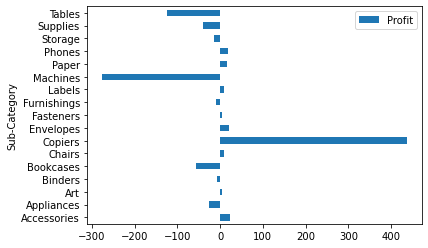

In [22]:
sub_pro=pd.pivot_table(store_discount,index='Sub-Category',values='Profit')
sub_pro.plot(kind='barh')

- Copiers having huge profit and Machines having heavy losses

### Sub-Category vs Sales

<AxesSubplot:ylabel='Sub-Category'>

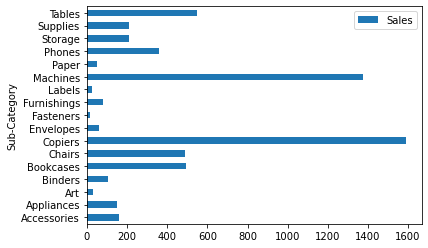

In [23]:
sub_sales=pd.pivot_table(store_discount,index='Sub-Category',values='Sales')
sub_sales.plot(kind='barh')

- Here we see that copiers had highest sale and Machines had second highest sales

- In above two graph we see that 'Machines' had second highest sale but due to large discount it is  in loss 

### Profit across the Region


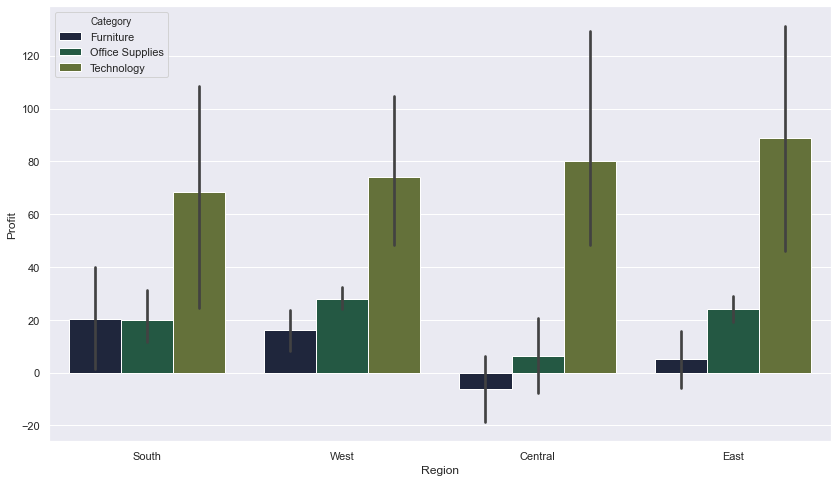

In [24]:

plt.figure(figsize = (14,8))
sb.set(font_scale=1, palette= "cubehelix")
sb.barplot(data = store , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

- "Furniture" Category is the only loss making sector that to only in Central Region

### Region wise Profit/Loss

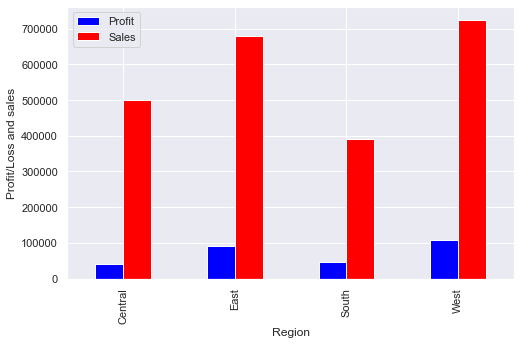

In [25]:
store.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

-  Profit and sales are maximum in west region and minimum in south region 

### State wise Profit/Loss

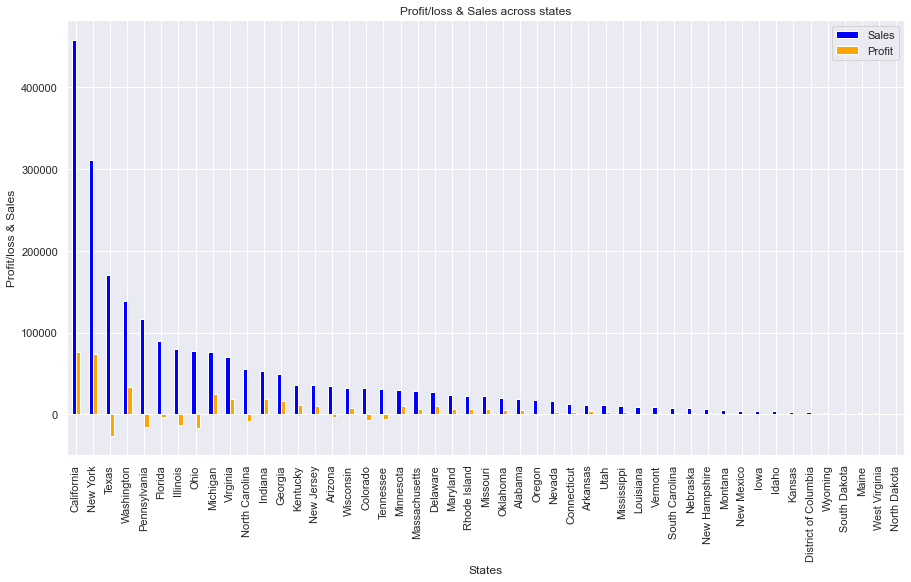

In [26]:
ps = store.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

- California and New york shows High Profit. 
- Texas, pennsylvania and Ohio shows loss

**As a business manager, try to find out the weak areas where you can work to make more profit?**
- Technology and Office Supplies have high profit.
- Furniture have less profit so we have to work on it .